# K Nearest Neighbors Project 

Welcome to the KNN Project! This will be a simple project very similar to the lecture, except you'll be given another data set. Go ahead and just follow the directions below.
## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Get the Data

In [2]:
df = pd.read_csv('KNN_Project_Data')

In [3]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   XVPM          1000 non-null   float64
 1   GWYH          1000 non-null   float64
 2   TRAT          1000 non-null   float64
 3   TLLZ          1000 non-null   float64
 4   IGGA          1000 non-null   float64
 5   HYKR          1000 non-null   float64
 6   EDFS          1000 non-null   float64
 7   GUUB          1000 non-null   float64
 8   MGJM          1000 non-null   float64
 9   JHZC          1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 86.1 KB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
XVPM,1000.0,1055.071157,370.980193,21.17,767.413366,1045.904805,1326.065178,2117.0
GWYH,1000.0,991.851567,392.278890,21.72,694.859326,978.355081,1275.528770,2172.0
TRAT,1000.0,1529.373525,640.286092,31.80,1062.600806,1522.507269,1991.128626,3180.0
TLLZ,1000.0,495.107156,142.789188,8.45,401.788135,500.197421,600.525709,845.0
IGGA,1000.0,940.590072,345.923136,17.93,700.763295,939.348662,1182.578166,1793.0
HYKR,1000.0,1550.637455,493.491988,27.93,1219.267077,1564.996551,1891.937040,2793.0
EDFS,1000.0,1561.003252,598.608517,31.96,1132.097865,1565.882879,1981.739411,3196.0
GUUB,1000.0,561.346117,247.357552,13.52,381.704293,540.420379,725.762027,1352.0
MGJM,1000.0,1089.067338,402.666953,23.21,801.849802,1099.087954,1369.923665,2321.0
JHZC,1000.0,1452.521629,568.132005,30.89,1059.499689,1441.554053,1864.405512,3089.0


# EDA

Since this data is artificial, we'll just do a large pairplot with seaborn.

**Use seaborn on the dataframe to create a pairplot with the hue indicated by the TARGET CLASS column.**

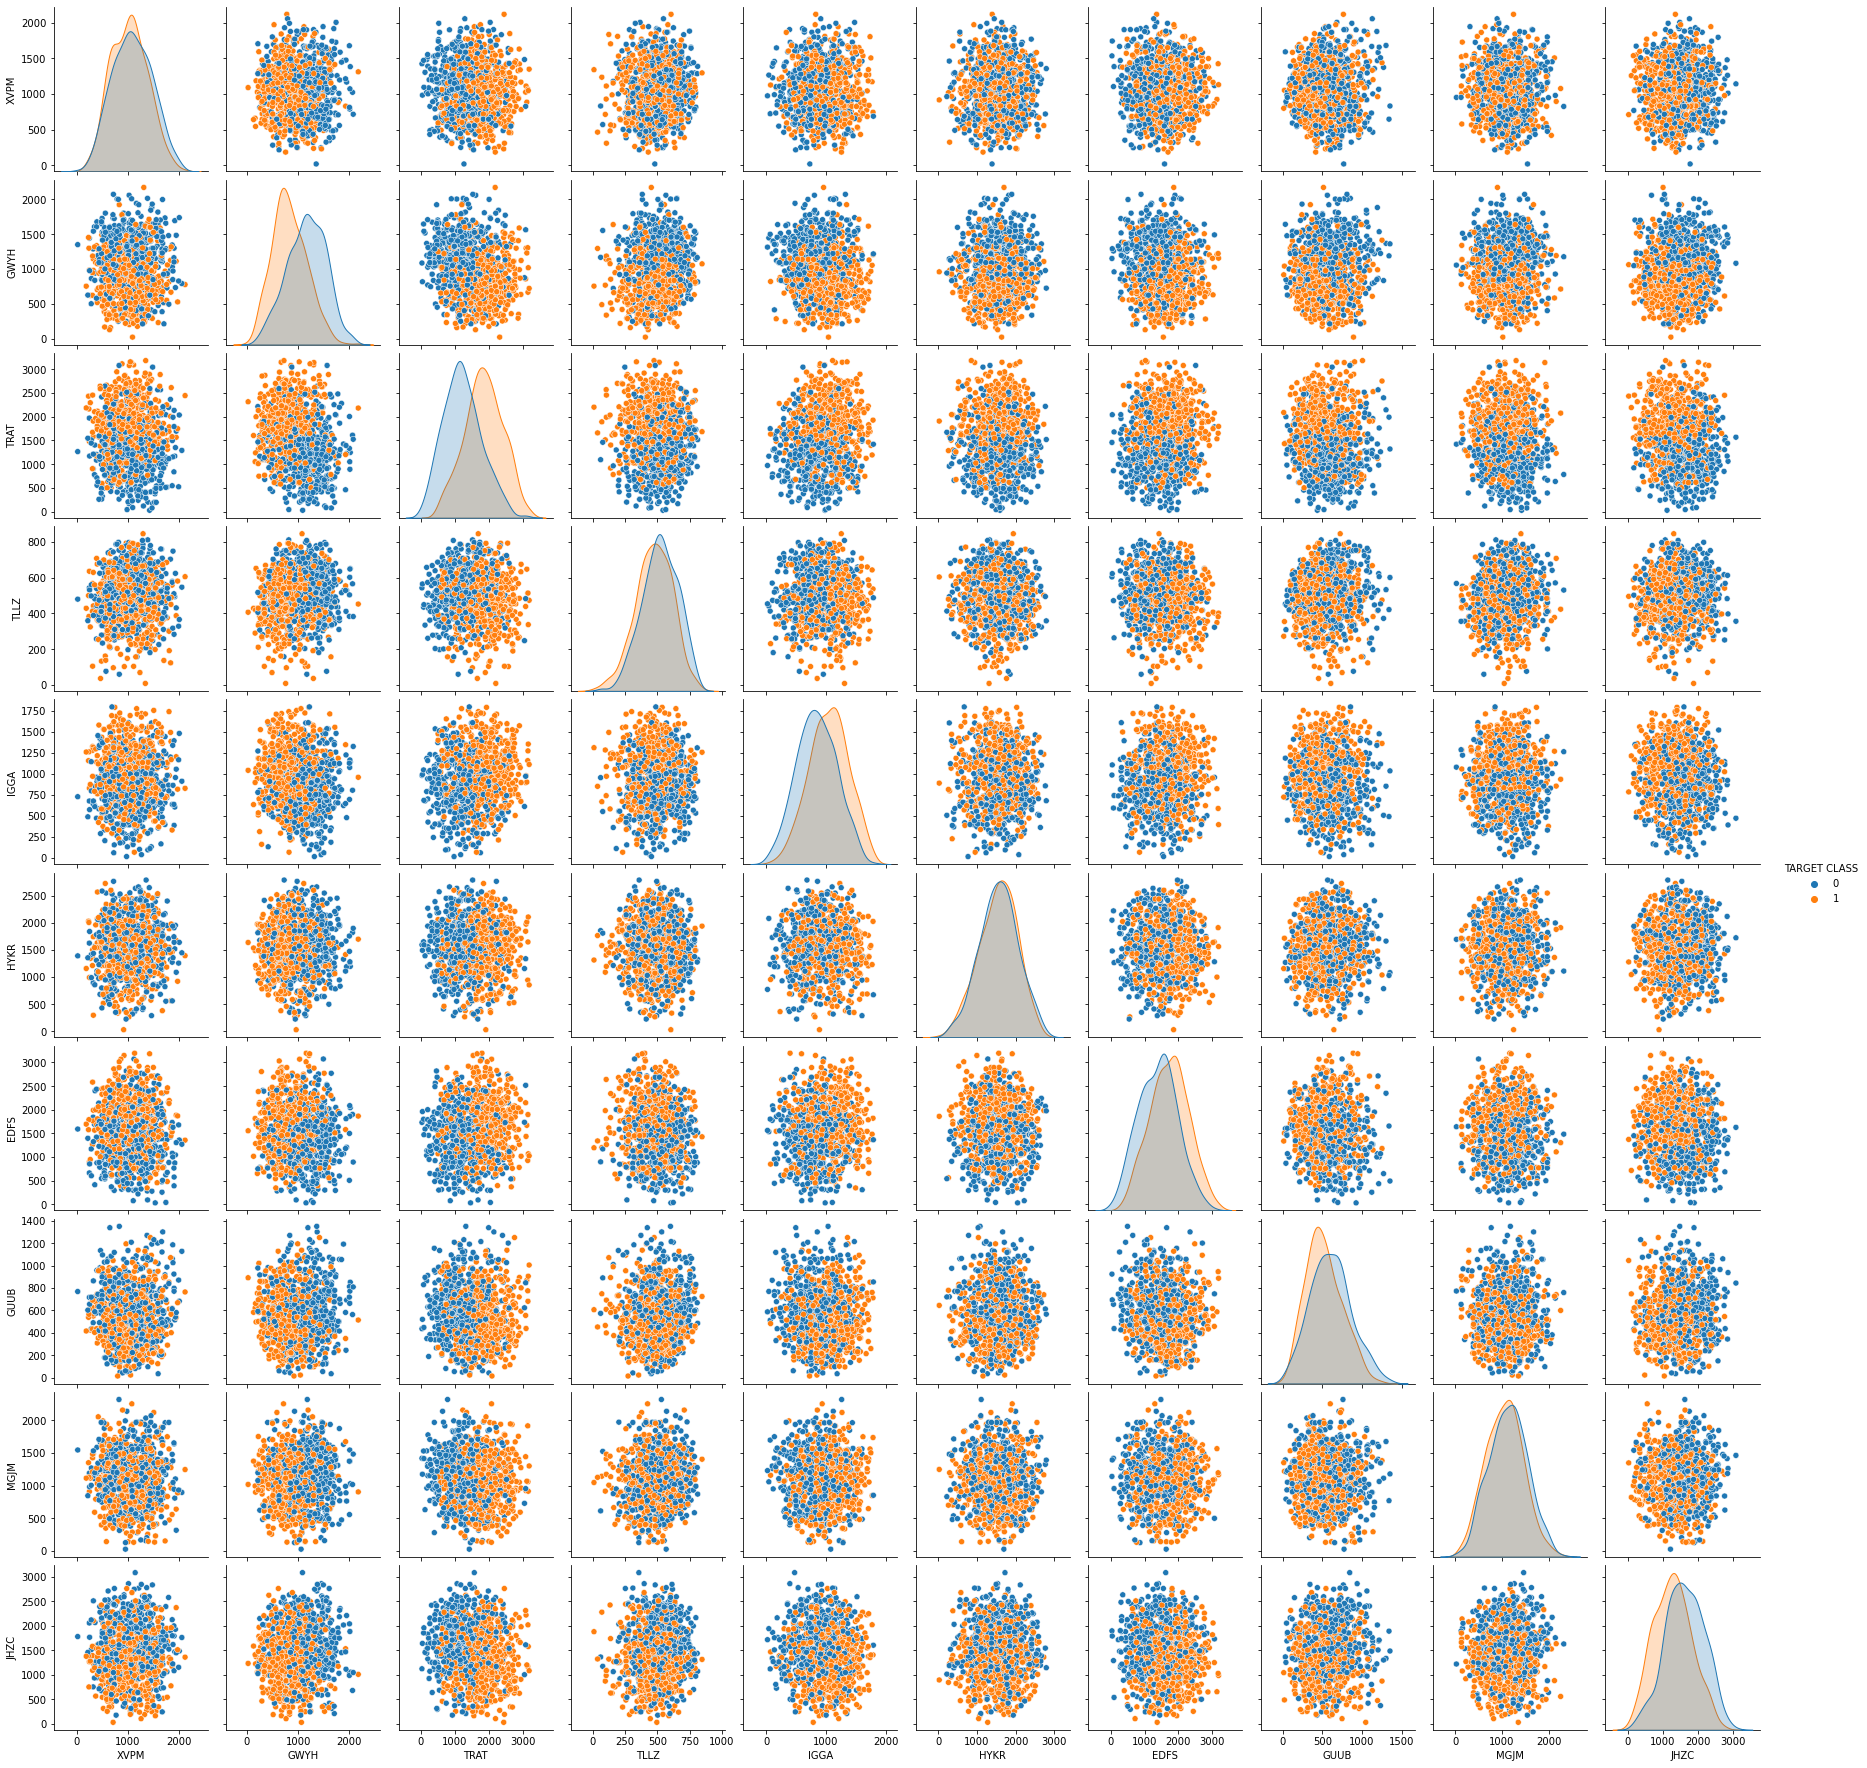

In [7]:
sns.pairplot(data=df, hue='TARGET CLASS');

# Standardize the Variables & Train Test Split

Time to standardize the variables.

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

**Convert the scaled features to a dataframe and check the head of this dataframe to make sure the scaling worked.**

In [22]:
scaled_X_train = pd.DataFrame(scaled_X_train, columns=X_train.columns)
scaled_X_test = pd.DataFrame(scaled_X_test, columns=X_train.columns)

In [23]:
scaled_X_train.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,-2.131207,-0.029876,-0.070741,1.011517,-0.332789,-1.132088,-1.079541,0.190234,-0.459044,-0.293330
1,0.551623,-1.708943,0.268688,0.458320,1.216487,-0.080555,0.934718,-0.215476,0.294657,1.362008
2,0.492807,-1.186567,0.283564,-0.724657,-0.387366,-1.314568,1.201963,-1.494292,-0.505361,-0.628549
3,0.473814,0.376672,0.200586,0.409384,-1.979776,1.228047,1.800494,0.634393,1.210954,-0.144551
4,-0.025188,-0.425766,1.465413,0.357559,0.641439,0.316196,0.519274,-0.551063,-0.064037,-2.187418


In [24]:
scaled_X_test.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
0,0.233124,-0.613719,1.949048,-0.064467,0.756386,-0.893825,1.482365,-0.288681,-0.407504,-1.266715
1,1.703217,-1.238588,-0.951005,-2.493479,0.838432,-0.574355,0.469501,1.307313,0.601196,0.537749
2,0.879026,0.076255,-2.078641,-1.620142,-0.700990,1.494492,0.173720,0.272296,0.153380,-0.193676
3,0.106299,-1.491573,1.092359,-1.358921,-1.077716,-1.793400,0.827100,-0.642375,-0.189694,0.269657
4,0.492666,0.362848,-0.154171,-1.565505,-0.296330,-2.126629,-0.616891,-1.540496,-1.030811,0.587027


# Using KNN

**Create a KNN model instance with n_neighbors=1**

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
knn = KNeighborsClassifier(n_neighbors=1)

**Fit this KNN model to the training data.**

In [27]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

# Predictions and Evaluations
Let's evaluate our KNN model!

**Use the predict method to predict values using your KNN model and X_test.**

In [28]:
predictions = knn.predict(scaled_X_test)

In [30]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       152
           1       0.72      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



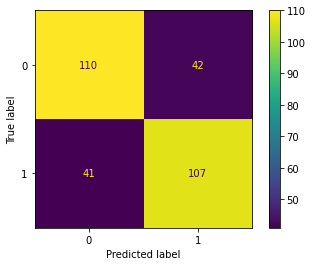

In [32]:
plot_confusion_matrix(knn, scaled_X_test, y_test);

# Choosing a K Value (using Elbow Method)
Let's go ahead and use the elbow method to pick a good K Value!

**Create a for loop that trains various KNN models with different k values, then keep track of the error_rate for each of these models with a list.**

In [44]:
error_rate = []

for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(scaled_X_train, y_train)
    i_pred = knn.predict(scaled_X_test)
    error_rate.append(np.mean(y_test != i_pred))

**Now create the following plot using the information from your for loop.**

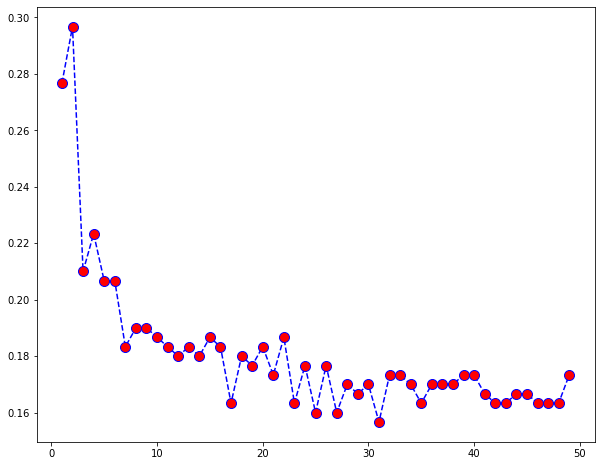

In [46]:
plt.figure(figsize=(10, 8))
plt.plot(range(1, 50), error_rate, color='blue', linestyle='--', marker='o', markersize=10, markerfacecolor='red');

## Retrain with new K Value

**Retrain your model with the best K value (up to you to decide what you want) and re-do the classification report and the confusion matrix.**

In [36]:
knn = KNeighborsClassifier(n_neighbors=31)

In [37]:
knn.fit(scaled_X_train, y_train)

KNeighborsClassifier(n_neighbors=31)

In [38]:
predictions = knn.predict(scaled_X_test)

In [39]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.88      0.85       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.85      0.84      0.84       300



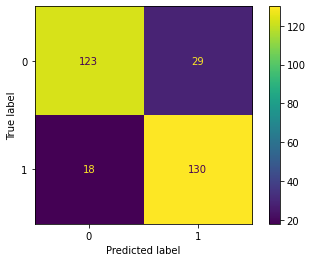

In [40]:
plot_confusion_matrix(knn, scaled_X_test, y_test);

# Great Job!